In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = np.load('us_topo.npy')

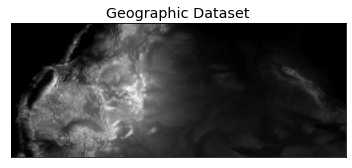

In [64]:
plt.Figure(figsize=(8.3, 11.7))
plt.rcParams.update({'font.size':12})
plt.imshow(data[:,-1].reshape(100,250), interpolation='bilinear', cmap=cm.gray,
                origin='lower');
plt.xticks([])
plt.yticks([]);
plt.savefig('geo_img.png')
plt.title('Geographic Dataset');